- github colab : https://homl.info/colab3

In [45]:
# 일단 박고 시작

import matplotlib
import matplotlib.pyplot
import pathlib

matplotlib.pyplot.rc('font', size=14)
matplotlib.pyplot.rc('axes', labelsize=14, titlesize=14)
matplotlib.pyplot.rc('legend', fontsize=14)
matplotlib.pyplot.rc('xtick', labelsize=10)
matplotlib.pyplot.rc('ytick', labelsize=10)

output_dir = pathlib.Path() / "images" / "training_linear_models"
output_dir.mkdir(parents=True, exist_ok=True)
print(f'output_dir : {output_dir}')

def matplotlib_to_imagefile(output_dir, filename, imgext="png", tight_layout=True, resolution=300):
    path = output_dir / f"{filename}.{imgext}"
    if tight_layout:
        matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig(path, format=imgext, dpi=resolution)

output_dir : images\training_linear_models


## Gradient Descent
- 이름 그대로 local gradient를 구한 다음 아래(cost function의 minimization)로 떨어지는 방향으로 전진해 나가는 기법이다
- Linear regression의 MSE(Mean Squared Error) cost function은 convex function이라고 함
    - convex function이라 함은 curve의 아무 두 point를 연결한 line이 있을 때 그 line은 언제나 curve보다 위에 있다는 것이다. 다시 말해 global minimum 하나만이 존재한다는 뜻
    - 왜인지는 모르겠.... 누군가 증명해 놨겠지
- Gradient descent를 쓸 때는 모든 feature가 비슷한 scale을 가져야 한다고 한다. 앞서 사용한 StandardScaler (mean 빼고 std로 나누기) 같은걸 쓰는 것. 안 그러면 converge 하는데 매우 오랜 시간이 걸린다고 한다

### Batch Gradient Descent
- 책에 나온 Equation 4-5가 좀 헷갈리는데 Equation 4-3의 MSE equation에서 $ (\theta^Tx^{(i)}-y^{(i)})^2 $ 이걸 쭉 전개한 다음 $ \theta_j $ 에 대해 편미분해본다고 생각해 보면 답이 나온다
    - 편미분 하게 되면 $ \theta_j $ 달린거 빼면 죄다 constant로 취급되어 날린다는 점을 기억하자
- 즉 이 Equation 4-5/4-6을 계산하려면 전체 dataset에 대해 편미분을 구해야 한다는 뜻이고 그렇다는건 엄청나게 느릴것이라는 뜻이다.
- 그래도 Normal Equation을 구하거나 SVD decomposition을 구하는 것 보다는 Gradient Descent가 빠르다고 한다

- Training set에 대한 한번의 iteration을 Epoch이라고 한다
- 즉 Epoch의 크기를 정한다는건 Training set을 몇번 iterate할거냐에 대한 것이다

### Stochastic Gradient Descent
- Training set에서 random instance **1개** 를 골라 잡아서 이걸로 gradient를 계산해 descent한다
- 1번에 하나씩만 골라 계산하므로 Batch Gradient Descent에 비해서는 훨씬 빠르다
- 하지만 전체 data set에 대해서 하는게 아니므로 매우 bouncy할 수 있다. 즉 minimum으로 smooth 하게 넘어가는게 아니라 위로 튀었다 아래로 튀었다 한다는 뜻이다. 매우 여러번 반복했을때 확률적으로 계속 수렴해 갈거라는걸 믿고 하는 것이다
    - 즉 이 특성상 minima 에 가까워 졌더라도 한 값에 안정되는게 아니라 계속 주변으로 튕겨 다닐 가능성이 높다
- data set이 매우 클때 유용하다
- 또한 randomness함이 (Convex하지 않은 경우를 말하는 것 같은데) Local minma에서 벗어나게 하는데 도움을 주기도 한다고 한다

- 주의 점
    - training instance (1번 편미분 계산에 쓰이는 데이터) 는 independent and identically distributed 해야 한다
    - 예를 들어 training instance가 선택되는 순서가 특정 label의 내림차순이라던가 비슷한 특정 label이 너무 연속으로 선택된다거나 하면 안된다
        - 이렇게 될 경우 gradient descent는 특정 label에 대해서만 learning후 그 다음 label에 대해 learning하는 대신 그 전 label에 대해서는 learning한게 무위로 돌아간다던가 할 수 있다
        - 확률적으로 global minimum을 향해 갈거라는 것을 믿고 하는 것이므로 저 '확률적으로'라는 부분의 random성이 보장 되어야 한다

### Mini-Batch Gradient Descent
- Batch와 Stochastic의 중간에 있는 것
- 한번에 여러개를 가져와서 한다는 것이다
- 책의 Figure 4-11 을 보면 Stochastic보다는 안정적이지만 그래도 Batch처럼 하나의 선이 아니고 꽤 랜덤하게 bounce한다

### Scikit-Learn
- SVD를 이용해 Pseudo-inverse를 사용해 한번에 문제를 푸는건 LinearRegression으로 구현 되어 있음
- Stochastic Gradient Descent는 SGDRegressor로 구현되어 있음
- 뭐 저 두개가 제일 쓸만하니까 결국 저 두개만 되어 있는거 아니겠나 ~_~

### Polynomial Regression
- Linear regression을 이용해서 Polynomial euqation을 fitting할수도 있따
- 예를 들어 $y=a_{n}x^{n}+a_{n-1}x^{n-1}+...+ax+c$ 같은것도 fitting 가능.
- 방법은 간단하게 polynomial feature를 추가하는 것으로 가능하다. 아래 코드 참조
    - 아래 코드의 식은 $y = 0.5x^{2} + x + 2$

[1.98962103] [[1.01072678 0.51283048]]
$y = 0.513x^{2} + 1.011x + 1.99$


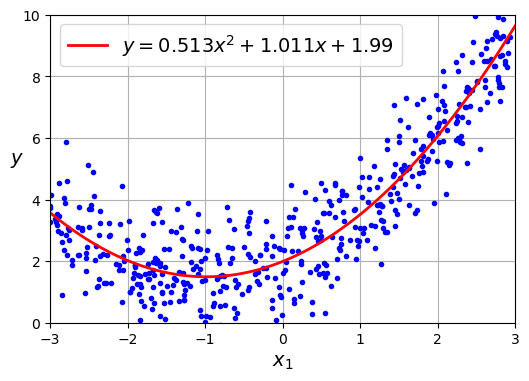

In [46]:
import numpy
import sklearn.preprocessing
import sklearn.linear_model

m = 100
X = 6 * numpy.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + numpy.random.randn(m, 1)

poly_features = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)

X_line = numpy.linspace(-3, 3, 100).reshape(100, 1)
X_line_poly = poly_features.transform(X_line)
y_line = lin_reg.predict(X_line_poly)

print(lin_reg.intercept_, lin_reg.coef_)

a = round(lin_reg.coef_[0][1],3)
b = round(lin_reg.coef_[0][0],3)
c = round(lin_reg.intercept_[0],3)

label_text = "$y = {}x^{{2}} + {}x + {}$".format(a,b,c)
print(label_text)

matplotlib.pyplot.figure(figsize=(6, 4))
matplotlib.pyplot.plot(X, y, "b.")
matplotlib.pyplot.plot(X_line, y_line, "r-", linewidth=2, label=label_text)
matplotlib.pyplot.xlabel("$x_1$")
matplotlib.pyplot.ylabel("$y$", rotation=0)
matplotlib.pyplot.axis([-3,3,0,10])
matplotlib.pyplot.legend(loc="upper left")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()



- Polynomial regression은 feature가 여러개일때는 마치 다음과 같이 적용 된다
    - $(a+b+c+d+...)^{n}$
- 그래서 $a^{n}$, $b^{n}$ 같은 것만 추가 되는게 아니고 $a^{n-1}b$, $b^{n-2}z^{2}$ 이런것도 추가 된다
- 즉 feature가 엄청나게 늘어날 수 있다! 적용 할 거라면 잘 생각해 보고 적용해야 한다

### Learning Curve
- Learning curve 란 train set의 사이즈를 점점 늘려봤을 때 training error와 validation error가 어떤 식으로 변화하는지 보여주는 방법이다
- 예를 들어 아래와 같은 경우를 보고는 underfitting되고 있다고 생각해 볼 수 있다
    - 처음에 점이 1,2개일때는 완벽하게 fitting할 수 있으므로 error가 0에서 시작한다
    - 점이 추가 되면서 model로 완벽하게 fitting이 안되므로 점점 늘다가 결국 training error는 plateau에 도달한다
    - validation에러는 처음에 점이 1,2개가 안되어 있을때는 generalization이 제대로 안되어 있으므로 매우 높게 시작한다
    - 하지만 점점 데이터가 늘어나면서 generalization이 잘 되면서 점점 error가 줄어든다
    - 그래프를 보면 training error와 validation error가 결국 만나서 그 이후로는 training set이 커져도 별 변화 없이 쭉 간다
        - 이런 현상이 일어나면 대략 model이 할만큼 했다라고 보는 듯
        - 그리고 이렇게 되었을 때 error가 여전히 높고 error가 줄어들지 않는다면 underfitting되었다고 생각하는 것 같다

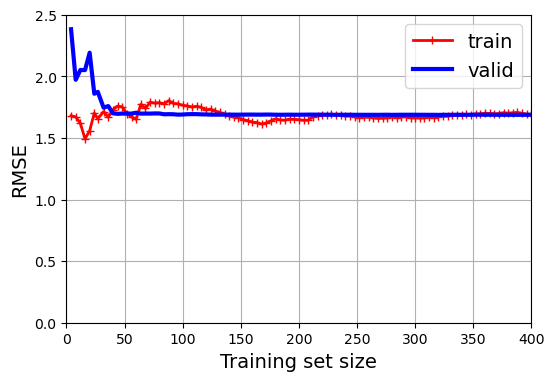

In [47]:
import sklearn.model_selection

train_sizes, train_scores, valid_scores = sklearn.model_selection.learning_curve(
    sklearn.linear_model.LinearRegression(), X, y, train_sizes=numpy.linspace(0.01, 1.0, 100), cv=5,
    scoring="neg_root_mean_squared_error")

# cv=5라서 5개의 valid_scores가 나옴. 이걸 mean한걸 그리는 것임
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

matplotlib.pyplot.figure(figsize=(6, 4))  # extra code – not needed, just formatting
matplotlib.pyplot.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
matplotlib.pyplot.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
matplotlib.pyplot.xlabel("Training set size")
matplotlib.pyplot.ylabel("RMSE")
matplotlib.pyplot.grid()
matplotlib.pyplot.legend(loc="upper right")
matplotlib.pyplot.axis([0, int(m*0.8), 0, 2.5])

matplotlib.pyplot.show()

- 아래 같은 경우 equation을 10차까지 늘려서 다시 fitting 해 본다
- 10차는 처음 10개까지는 완벽하게 fitting하는걸 볼 수 있다. 그리고 이때 validation error는 엄청나게 높은걸 볼 수 있다. 전형적인 overfitting이다
- 점점 training data가 늘어나면서 validation error와 training error가 점점 줄어들기는 하는데 둘이 잘 만나질 못하고 있다. validation error가 현격하게 높으므로 여전히 overfitting중이라고 생각해 볼 수 있다
- 그래도 training data가 늘어나면서 error는 개선 된다

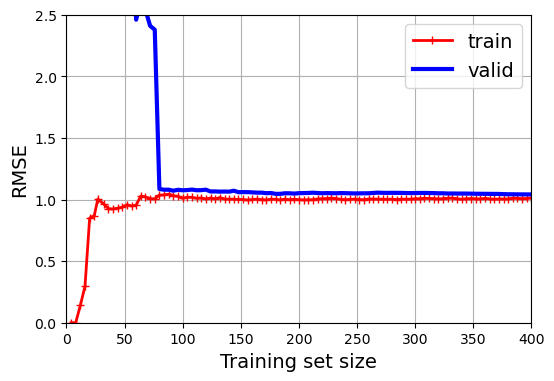

In [48]:
# 10차까지 늘려서 fitting 해보기
import sklearn.pipeline

polynomial_regression = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.PolynomialFeatures(degree=10, include_bias=False),
    sklearn.linear_model.LinearRegression()
)

train_sizes, train_scores, valid_scores = sklearn.model_selection.learning_curve(
    polynomial_regression, X, y, train_sizes=numpy.linspace(0.01, 1.0, 100), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

matplotlib.pyplot.figure(figsize=(6, 4))  # extra code – not needed, just formatting
matplotlib.pyplot.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
matplotlib.pyplot.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
matplotlib.pyplot.legend(loc='upper right')
matplotlib.pyplot.xlabel("Training set size")
matplotlib.pyplot.ylabel("RMSE")
matplotlib.pyplot.grid()
matplotlib.pyplot.axis([0, int(m*0.8), 0, 2.5])
matplotlib.pyplot.show()


[1.98078464] [[ 9.13882482e-01  6.35284874e-01  1.02027803e-01 -1.31289199e-01
  -2.94255086e-02  4.62654549e-02  3.01432793e-03 -6.56476355e-03
  -9.14153363e-05  3.24047107e-04]]


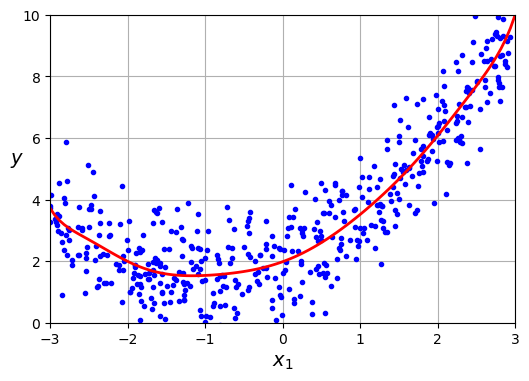

In [49]:
poly_features = sklearn.preprocessing.PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

# 선 그려보기
X_line = numpy.linspace(-3, 3, 100).reshape(100, 1)
X_line_poly = poly_features.transform(X_line)
y_line = lin_reg.predict(X_line_poly)

matplotlib.pyplot.figure(figsize=(6, 4))
matplotlib.pyplot.plot(X, y, "b.")
matplotlib.pyplot.plot(X_line, y_line, "r-", linewidth=2)
matplotlib.pyplot.xlabel("$x_1$")
matplotlib.pyplot.ylabel("$y$", rotation=0)
matplotlib.pyplot.axis([-3,3,0,10])
matplotlib.pyplot.grid()
matplotlib.pyplot.show()


